In [140]:
#交通流量预测
# 工号：11812
# 姓名：柳伟
# 部门：EPG

In [141]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# 读入数据集
df = pd.read_csv('./train.csv')

In [143]:
# 查看是否有空值数据
df.isnull().sum().sort_values(ascending=False)

ID          0
Datetime    0
Count       0
dtype: int64

In [144]:
#取日期
df['Datetime'] = df['Datetime'].str[:11]

In [145]:
#改为pd时间格式
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [146]:
df

,ID,Datetime,Count
0,0,2012-08-25,8
1,1,2012-08-25,2
2,2,2012-08-25,6
3,3,2012-08-25,2
4,4,2012-08-25,2
...,...,...,...
18283,18283,2014-09-25,868
18284,18284,2014-09-25,732
18285,18285,2014-09-25,702
18286,18286,2014-09-25,580


In [147]:
# 删除无用数据列
df = df.drop(['ID'],axis=1)

In [148]:
df

,Datetime,Count
0,2012-08-25,8
1,2012-08-25,2
2,2012-08-25,6
3,2012-08-25,2
4,2012-08-25,2
...,...,...
18283,2014-09-25,868
18284,2014-09-25,732
18285,2014-09-25,702
18286,2014-09-25,580


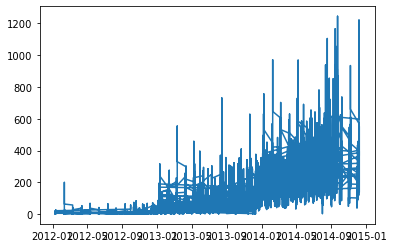

In [149]:
#查看数据情况
plt.plot(df['Datetime'],df['Count'])
plt.show()

In [150]:
#查看数据尺寸
df.shape

(18288, 2)

In [151]:
#按天聚合
df = df.groupby(['Datetime'],as_index=False).sum()

In [152]:
df

,Datetime,Count
0,2012-01-09,112
1,2012-01-10,248
2,2012-01-11,304
3,2012-01-12,210
4,2012-02-09,118
...,...,...
757,2014-12-05,6826
758,2014-12-06,7540
759,2014-12-07,5858
760,2014-12-08,14762


In [153]:
#分割数据集
df_train = df[:600]
df_test = df[600:]

In [154]:
#打印数据尺寸
df_train.shape
df_test.shape

(162, 2)

In [155]:
#时间列为索引
df_train.index = df_train.Datetime
df_test.index = df_test.Datetime
df.index = df.Datetime

In [156]:
df_train
df_test

,Datetime,Count
Datetime,,
2014-04-29,2014-04-29,6650
2014-04-30,2014-04-30,6812
2014-05-01,2014-05-01,2382
2014-05-02,2014-05-02,6108
2014-05-03,2014-05-03,6334
...,...,...
2014-12-05,2014-12-05,6826
2014-12-06,2014-12-06,7540
2014-12-07,2014-12-07,5858


In [157]:
df_train = df_train.drop(['Datetime'],axis=1)
df_test = df_test.drop(['Datetime'],axis=1)
df = df.drop(['Datetime'],axis=1)

In [158]:
# 重命名列名
df_train['ds'] = df_train.index
df_train['y'] = df_train.Count

df_test['ds'] = df_test.index
df_test['y'] = df_test.Count

df['ds'] = df.index
df['y'] = df.Count

In [159]:
df_train
df_test

,Count,ds,y
Datetime,,,
2014-04-29,6650,2014-04-29,6650
2014-04-30,6812,2014-04-30,6812
2014-05-01,2382,2014-05-01,2382
2014-05-02,6108,2014-05-02,6108
2014-05-03,6334,2014-05-03,6334
...,...,...,...
2014-12-05,6826,2014-12-05,6826
2014-12-06,7540,2014-12-06,7540
2014-12-07,5858,2014-12-07,5858


In [160]:
#删除无效列
df_train = df_train.drop(['Count'],axis=1)
df_test = df_test.drop(['Count'],axis=1)
df = df.drop(['Count'],axis=1)

In [161]:
df_train
df_test

,ds,y
Datetime,,
2014-04-29,2014-04-29,6650
2014-04-30,2014-04-30,6812
2014-05-01,2014-05-01,2382
2014-05-02,2014-05-02,6108
2014-05-03,2014-05-03,6334
...,...,...
2014-12-05,2014-12-05,6826
2014-12-06,2014-12-06,7540
2014-12-07,2014-12-07,5858


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


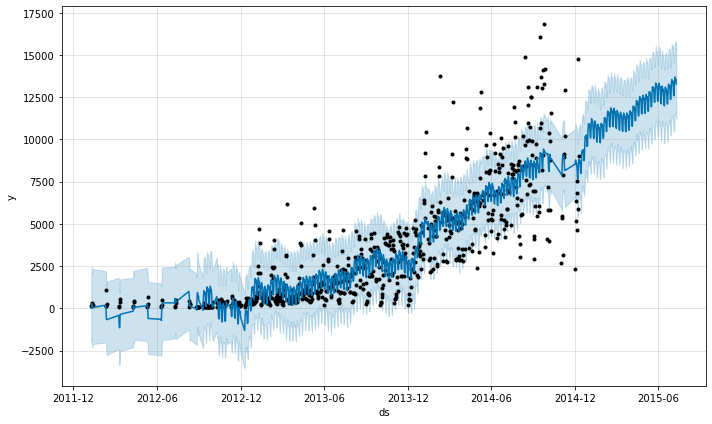

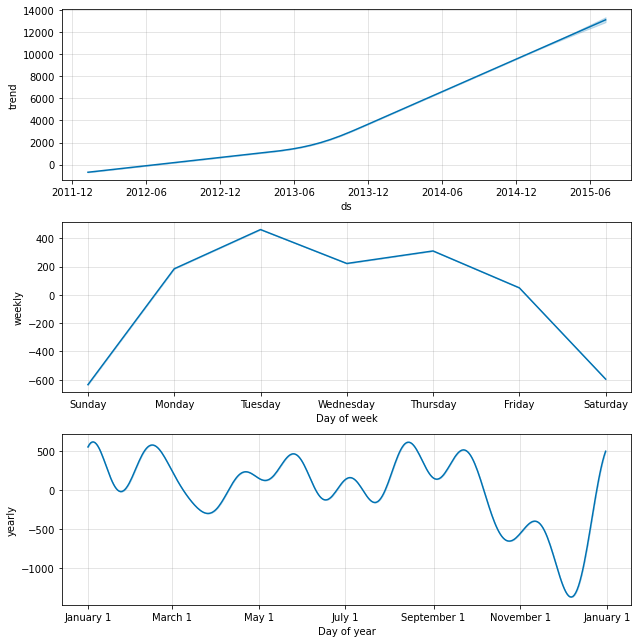

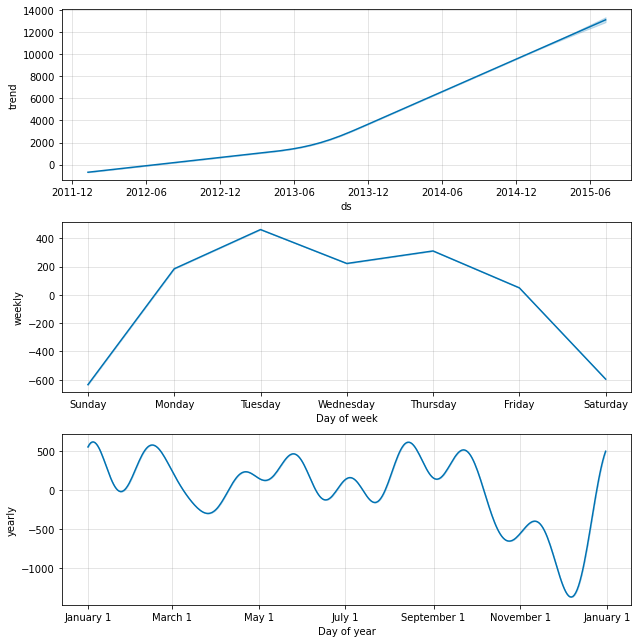

In [162]:
#拟合模型
m = Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(df)
#构建预测数据框
future = m.make_future_dataframe(periods=213)
#预测数据
forecast = m.predict(future)
#展示预测结果
m.plot(forecast)
plt.show()
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
m.plot_components(forecast)

#拟合模型
m = Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(df_train)

#构建预测数据框
future = m.make_future_dataframe(periods=213)
#预测数据
forecast = m.predict(future)

forecast

#展示预测结果
m.plot(forecast)
plt.show()

plt.plot(df_test)
plt.show


# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
m.plot_components(forecast)